<a href="https://colab.research.google.com/github/mrizazul/PCVK_GENAP_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


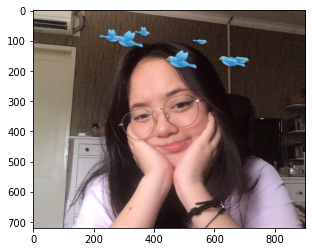

In [68]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Assets/aset1.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


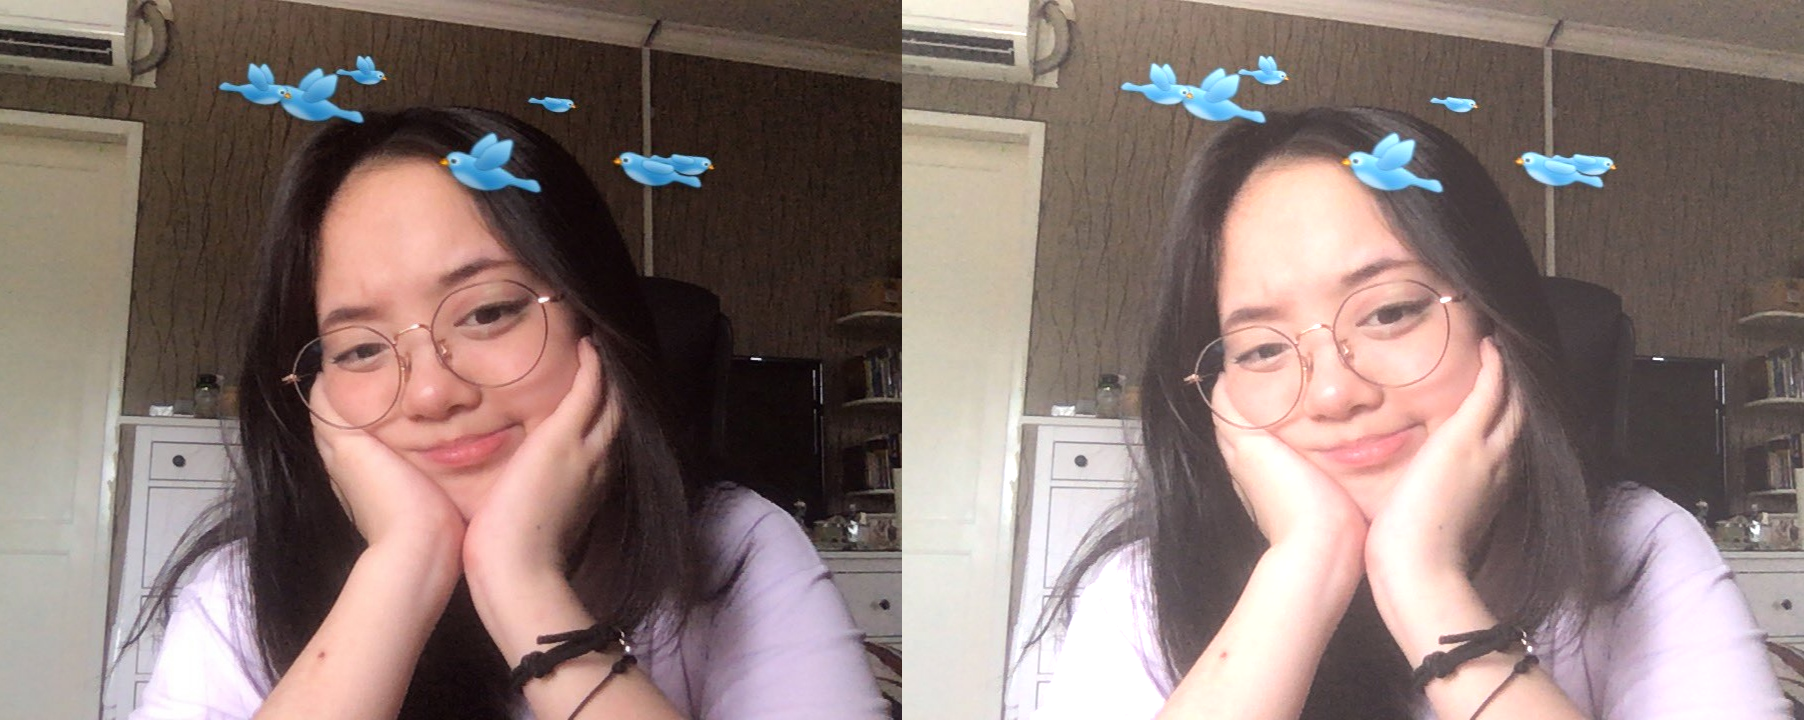

In [23]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Assets/aset1.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

In [ ]:
new_image = np.zeros(image.shape, image.dtype)

print(' Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: '))
except ValueError:
    print('Error, not a number')


for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(contrast*image[y,x,c] + brightness, 0, 255)
plt.imshow(image)
cv2_imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

In [ ]:
print(' -------------------------------- ')

try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

In [ ]:
photo_data = image

photo_data[:] = photo_data.mean(axis=-1, keepdims=1) 

plt.imshow(photo_data)

In [ ]:
photo_data1 = image
photo_data1[:] = np.max(photo_data,axis=-1,keepdims=1)/2+np.min(photo_data,axis=-1,keepdims=1)/2
plt.imshow(photo_data1)

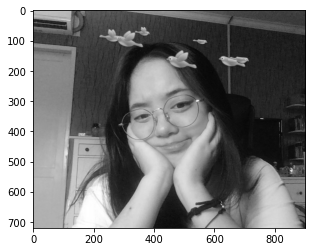

In [71]:
photo_data2 = image
W = [0.2,0.5,0.3] # weights
W_mean = np.tensordot(photo_data,W, axes=((-1,-1)))[...,None]
photo_data2[:] = W_mean.astype(photo_data.dtype)
plt.imshow(photo_data1)